<a href="https://colab.research.google.com/github/maxant38/TP-Clustering-Classification/blob/main/TP_%E2%80%93_Clustering_et_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="#ff6347">  TP Clustering et Classification UP:Machine Learning </font>

<hr style="text-align:center; width:50%"/>

**Indications:**

1. Programmez dans le langage de votre choix la méthode de k-moyennes,
testez le sur des données ”jouet” avec des clusters bien séparés et sur
des données plus compliqu´ees. Comparez vos r´esultats avec ceux issus
d’une fonction existante.

2. En utilisant R appliquer les fonctions de clustering (classification nonsupervisée) sur les données iris qui existent dans la base R. Il y a
déjà une classification faite (en trois classes), cette classification nous
permettra de juger de la qualit´e des m´ethodes appliquées.
— Représenter graphiquement les résultats de chaque méthode de
clustering.
— Interpréter les résultats obtenus.
— Utilisez maintenant la fonction de classification par la méthode KNN. Dressez la matrice de confusion.



<hr style="text-align:center; width:50%"/>

<font color="pink">

 CAILLE Maxence 
</font>

# **Partie 1**

Rapper en pseudo-code de l'algorithme :

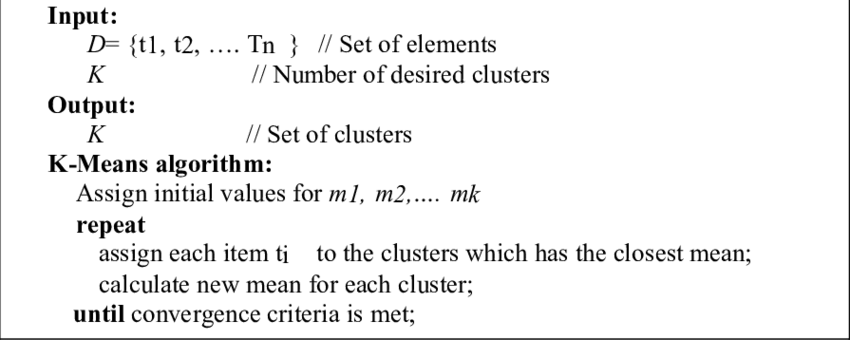

## **Importation des librairies**

In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division
from sklearn import preprocessing
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm


np.random.seed(1)

## **Function Distance entre deux points**

Je vais utiliser la distance euclidienne avec le produit scalaire qui est 20 fois plus rapide que celle que l'on pourrait naivement utilisé (source : https://www.dabblingbadger.com/blog/2020/2/27/implementing-euclidean-distance-matrix-calculations-from-scratch-in-python )

In [ ]:
def pairwise_dist(self, x, y):

        xSumSquare = np.sum(np.square(x),axis=1);
        ySumSquare = np.sum(np.square(y),axis=1);
        produit_scalaire = np.dot(x, y.T);
        dists = np.sqrt(abs(xSumSquare[:, np.newaxis] + ySumSquare-2*produit_scalaire))
        return dists

## **Initialisation des centres**

Cette fonction prend le tableau de points et choisit K d'entre eux au hasard pour être les centroïdes initiaux. La fonction renvoie les K points sélectionnés.

In [ ]:
def _init_centers(self, points, K, **kwargs):
  
        row, col = points.shape
        retArr = np.empty([K, col])

        for number in range(K):
            randIndex = np.random.randint(row)
            retArr[number] = points[randIndex]

        return retArr

## **Mise à jour de l'affectation**

La fonction d'affectation des mises à jour est responsable du choix du cluster auquel chaque point doit appartenir. D'abord, je calcule la distance entre chaque point et chaque centroïde en utilisant la fonction pairwise_dist. Ensuite, j'obtiens l'indice de la distance minimale pour chaque ligne. L'indice de la distance minimale est également l'indice de l'affectation de cluster pour le point de données donné, puisque nous voulons affecter chaque point au centroïde le plus proche.

In [ ]:
def _update_assignment(self, centers, points):

        row, col = points.shape
        cluster_idx = np.empty([row])
        distances = self.pairwise_dist(points, centers)
        cluster_idx = np.argmin(distances, axis=1)

        return cluster_idx

## **Mis à jour des centres**

La fonction de mise à jour des centres est responsable de la moyenne de tous les points qui appartiennent à un cluster donné. Cette moyenne est le nouveau centroïde de l'amas respectif. La fonction renvoie le tableau des nouveaux centres.

In [ ]:
def _update_centers(self, old_centers, cluster_idx, points):

        K, D = old_centers.shape
        new_centers = np.empty(old_centers.shape)
        for i in range(K):
            new_centers[i] = np.mean(points[cluster_idx == i], axis = 0)
        return new_centers

## **Calculer la perte**

In [ ]:
def _get_loss(self, centers, cluster_idx, points):

        dists = self.pairwise_dist(points, centers)
        loss = 0.0
        N, D = points.shape
        for i in range(N):
            loss = loss + np.square(dists[i][cluster_idx[i]])
        
        return loss

La fonction de perte est la métrique par laquelle nous évaluons la performance de notre algorithme de clustering. Notre perte est simplement la somme des distances carrées entre chaque point et son centroïde de cluster. Dans notre implémentation, nous appelons d'abord la distance par paire pour obtenir la matrice de distance entre chaque point et chaque centre. Nous sélectionnons la distance appropriée2 qui correspond au cluster pour chaque point en utilisant le cluster_idx.

## **Boucle principale**

In [ ]:
def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
  
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
        return cluster_idx

In [ ]:
def find_optimal_num_clusters(self, data, max_K=15):

        y_val = np.empty(max_K)

        for i in range(max_K):
            cluster_idx, centers, y_val[i] = KMeans()(data, i + 1)
            
        plt.plot(np.arange(max_K) + 1, y_val)
        plt.show()
        return y_val

In [14]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)


class KMeans(object):

    def __init__(self):  # Pas besoin d'implémenter un init
        pass

    def pairwise_dist(self, x, y): 

        xSumSquare = np.sum(np.square(x),axis=1);
        ySumSquare = np.sum(np.square(y),axis=1);
        mul = np.dot(x, y.T);
        dists = np.sqrt(abs(xSumSquare[:, np.newaxis] + ySumSquare-2*mul))
        return dists

    def _init_centers(self, points, K, **kwargs):  

        row, col = points.shape
        retArr = np.empty([K, col])
        for number in range(K):
            randIndex = np.random.randint(row)
            retArr[number] = points[randIndex]
        
        return retArr

    def _update_assignment(self, centers, points):

        row, col = points.shape
        cluster_idx = np.empty([row])
        distances = self.pairwise_dist(points, centers)
        cluster_idx = np.argmin(distances, axis=1)

        return cluster_idx

    def _update_centers(self, old_centers, cluster_idx, points):  

        K, D = old_centers.shape
        new_centers = np.empty(old_centers.shape)
        for i in range(K):
            new_centers[i] = np.mean(points[cluster_idx == i], axis = 0)
        return new_centers

    def _get_loss(self, centers, cluster_idx, points):  

        dists = self.pairwise_dist(points, centers)
        loss = 0.0
        N, D = points.shape
        for i in range(N):
            loss = loss + np.square(dists[i][cluster_idx[i]])
        
        return loss

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):

        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss

        return cluster_idx

Utilisation sur les données de la partie 2:
Attention il faut exécuter l'import des données de la partie 2 !

In [15]:
cluster_idx = KMeans()(x, 3) # appel de l'algorithme 

In [16]:
cluster_idx # On a bien 3 clusters 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [17]:
x_viz =   pd.DataFrame(x, columns = ["sepal_length"	,"sepal_width","petal_length","petal_width"])
x_viz = x_viz.drop(columns=["petal_length","petal_width"])
x_viz["class"] = cluster_idx



In [18]:
x_viz

,sepal_length,sepal_width,class
0,-0.900681,1.032057,0
1,-1.143017,-0.124958,0
2,-1.385353,0.337848,0
3,-1.506521,0.106445,0
4,-1.021849,1.263460,0
...,...,...,...
145,1.038005,-0.124958,1
146,0.553333,-1.281972,2
147,0.795669,-0.124958,1
148,0.432165,0.800654,1


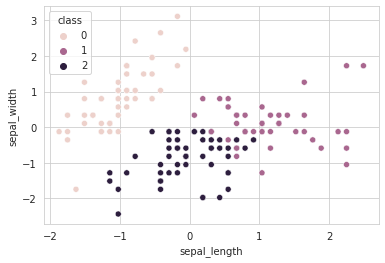

In [19]:
#Visualising the clusters
sns.scatterplot(data=x_viz, x="sepal_length", y="sepal_width", hue="class")

On constate que notre clustering marche bien. 

# **Partie 2**

## **Import des librairies & données**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
try:
  req = requests.get('https://raw.githubusercontent.com/maxant38/TP-Clustering-Classification/main/IRIS.csv')
except requests.exceptions.RequestException as e:
  print(e)

url_content = req.content
csv_file = open('iris.csv', 'wb')
csv_file.write(url_content)
csv_file.close()
iris = pd.read_csv('iris.csv')

In [4]:
x = iris.iloc[:, [0, 1, 2, 3]].values

## **Rapide analyse des données**

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


On a quatre caractéristiques sur les iris + la colonne specis qui est notre colonne "class".

In [7]:
#Distribution des classes dans le dataset
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

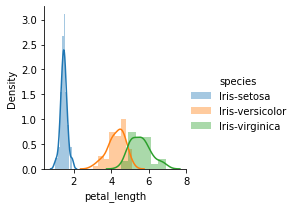

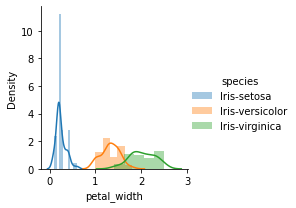

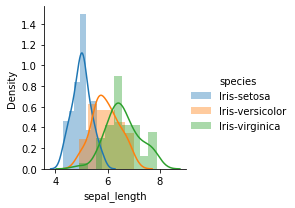

In [8]:

iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()



On voit que les trois espèces ont des caractéristiques très différentes.

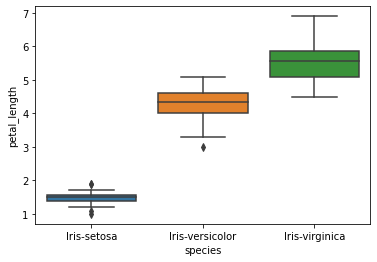

In [9]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()


Les Iris-Viginica ont des longeurs de pétales les plus longues en moyenne.

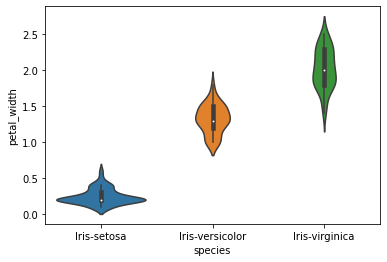

In [10]:
sns.violinplot(x="species",y="petal_width",data=iris)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


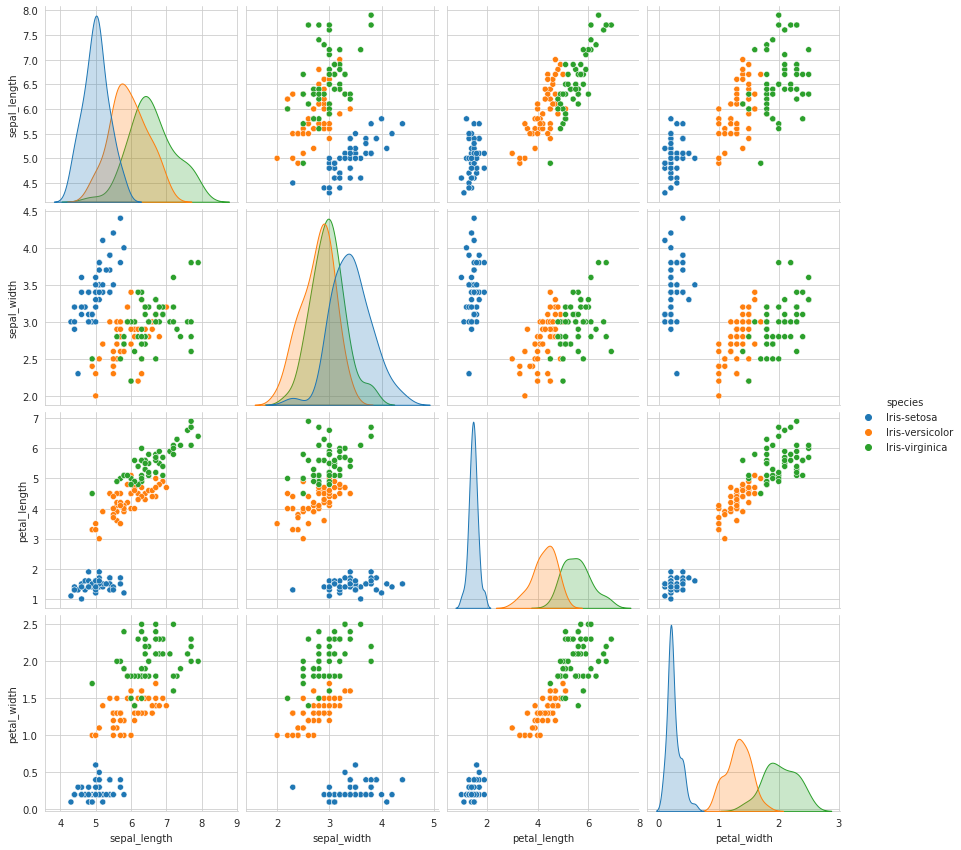

In [11]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()


## **Normalisation de nos données**

Il faut que l'on normalise nos données pour:<br/>
- K-Means : car on utilise la distance euclidienne et on n'a pas les variables dans les mêmes unités
- K-nearest neighbours : de même on calcule une distanc entre deux points

In [12]:
#On normalise nos valeurs

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)


## **Utilisation de la méthode du coude pour déterminer le nombre optimal de clusters pour le clustering k-means.**

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

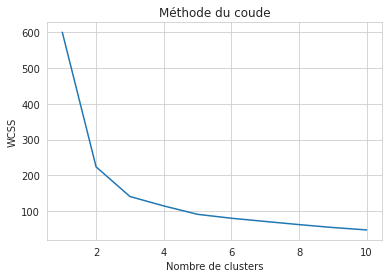

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS') #c'est  : within cluster sum of squares
plt.show()

On voit que le dernier coude est pour k=3 , ce qui est logique car nous avons 3 classes dans notre dataset.

## **Implémentation de K-means avec Sklearn**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

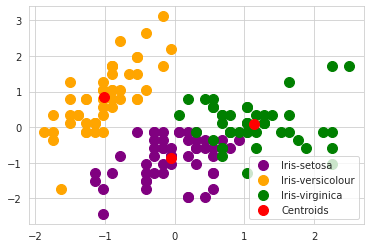

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

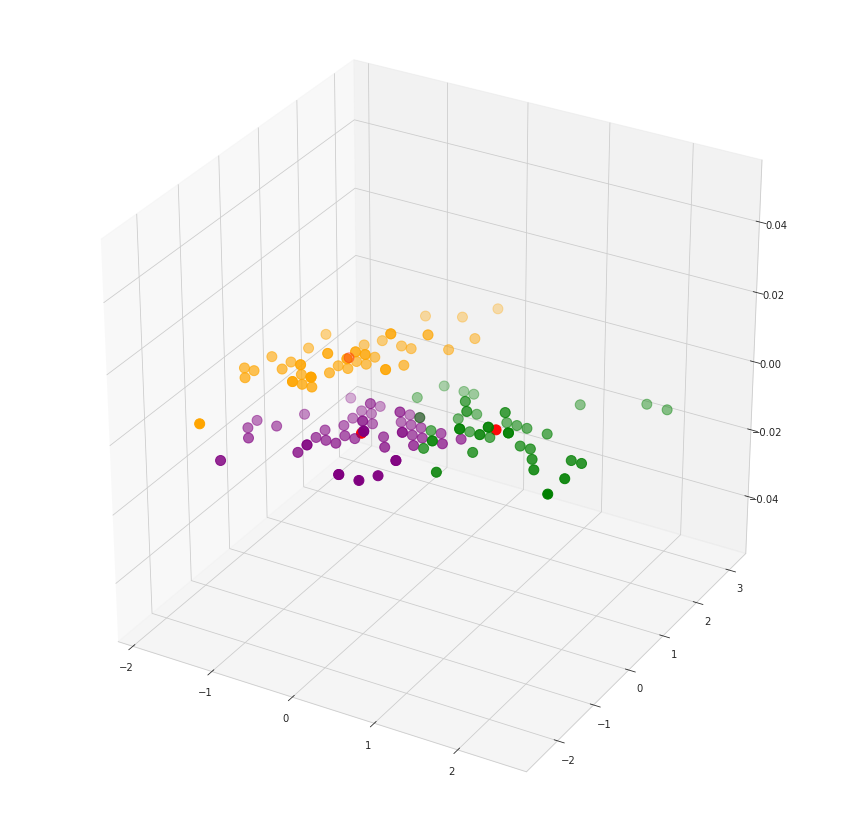

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

## **Utilisation de méthode hiérachique de clustering (top -> bottom)**

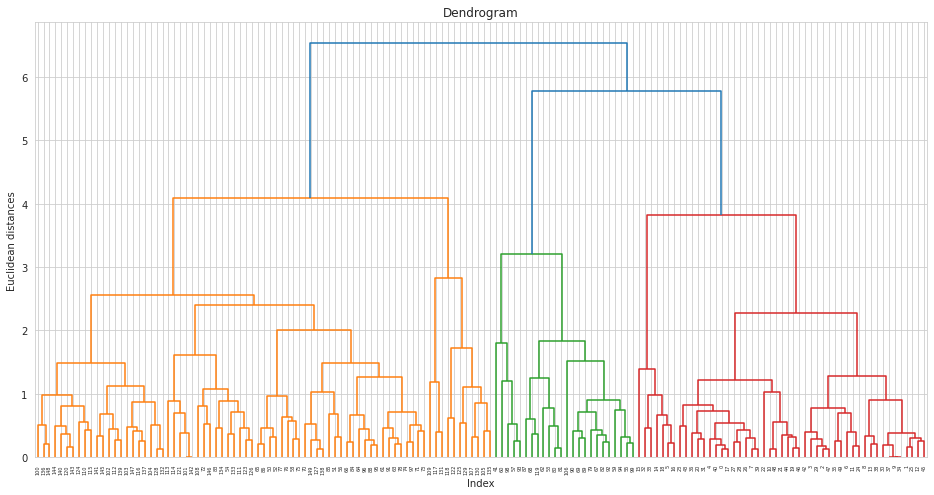

In [27]:
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(x, method  = "complete"))

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

Nos trois classes sont visibles, si on veut les récupérer il faut couper l'arbre de la manière suivante : 

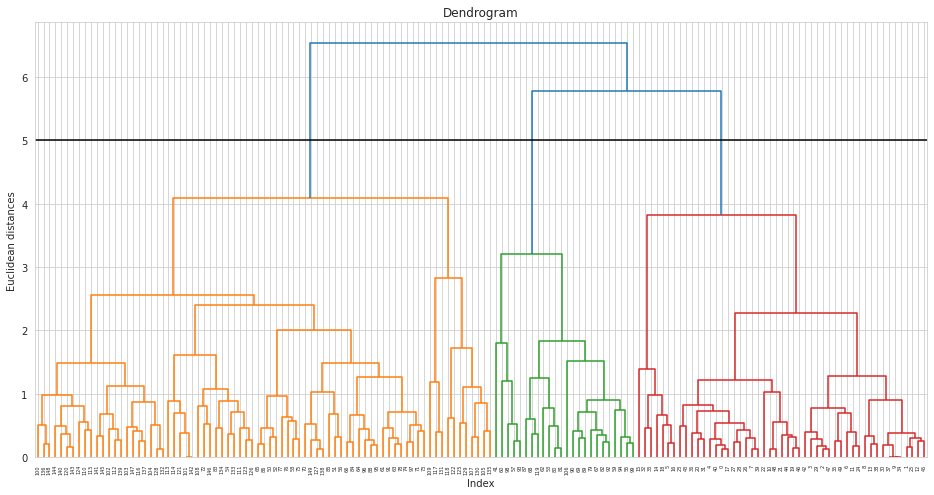

In [28]:
plt.figure(1, figsize = (16 ,8))

# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')

dendrogram = sch.dendrogram(sch.linkage(x, method  = "complete"))  # ‘complete" linkage uses the maximum distances between all observations of the two sets.

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

max_d = 5


## **Utilisation d'une méthode d'agglomération (bottom -> top)**

In [21]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete') # ‘complete" linkage uses the maximum distances between all observations of the two sets.

y_hc = hc.fit_predict(x)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
x_viz2 =   pd.DataFrame(x, columns = ["sepal_length"	,"sepal_width","petal_length","petal_width"])
x_viz2["class"] = y_hc

In [23]:
x_viz2

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,1
1,-1.143017,-0.124958,-1.341272,-1.312977,1
2,-1.385353,0.337848,-1.398138,-1.312977,1
3,-1.506521,0.106445,-1.284407,-1.312977,1
4,-1.021849,1.263460,-1.341272,-1.312977,1
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0
146,0.553333,-1.281972,0.705893,0.922064,0
147,0.795669,-0.124958,0.819624,1.053537,0
148,0.432165,0.800654,0.933356,1.447956,0


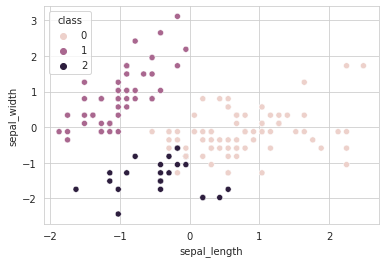

In [24]:
#Visualising the clusters
sns.scatterplot(data=x_viz2, x="sepal_length", y="sepal_width", hue="class")

## **KNN - Classification**

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [40]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
X_train, X_test, y_train, y_test = train_test_split(iris[['sepal_length', 'sepal_width', 
                                                        'petal_length', 'petal_width']],
                                                    iris['species'], random_state=0)

In [49]:
# initialize the Estimator object
knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
# fit the model to training set in order to predict classes
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
# create a prediction array for our test set
y_pred = knn.predict(X_test)

In [53]:
# based on the training dataset, our model predicts the following for the test set:
pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], 
          ignore_index=False, axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species,Predicted
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


In [54]:
# what is our score?
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


On peut tester plusieurs valeurs de K

In [64]:
k_range =range(1,30)

from sklearn import metrics
scores={}
scores_list = []
for k in k_range:
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k]= metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

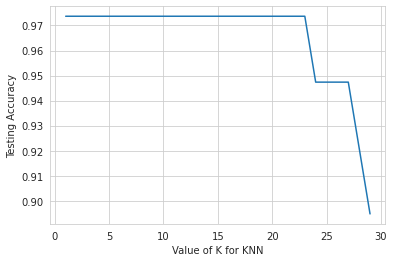

In [66]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')